In [1]:
from microstructpy.markets.continuous import ContinuousDoubleAuction
from microstructpy.traders.noise import *
from microstructpy.traders.market_maker import *
from microstructpy.traders.informed import *
from microstructpy.traders.ensemble import ensemble_traders
from microstructpy.visualization.summary import participant_comparison, price_path
from microstructpy.metrics.trader import *
from microstructpy.metrics.market import *
from microstructpy.markets.continuous import ContinuousDoubleAuction
from microstructpy.traders.strategy import *
from functools import partial
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
market = ContinuousDoubleAuction(initial_fair_price=1000)

market_maker = AdaptiveMarketMaker(market, 'AdaptiveMM')
noise = NoiseTrader(market, submission_rate=1, volume_size=np.random.randint(5, 55))

In [3]:
market.run(500)

100%|██████████| 500/500 [00:00<00:00, 16667.08it/s]


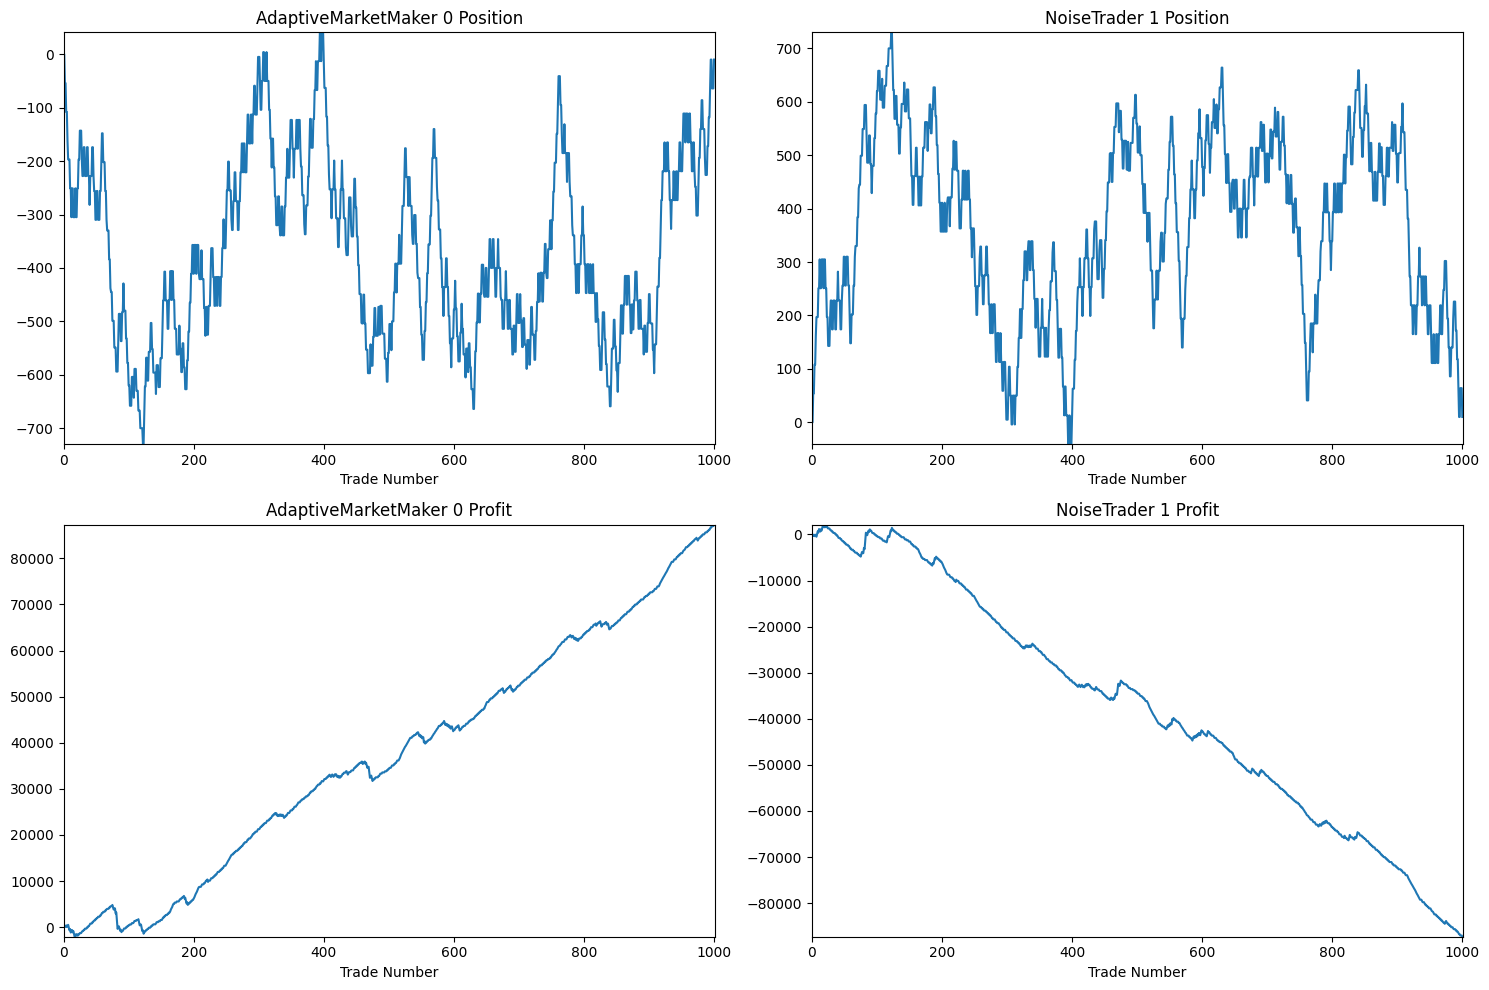

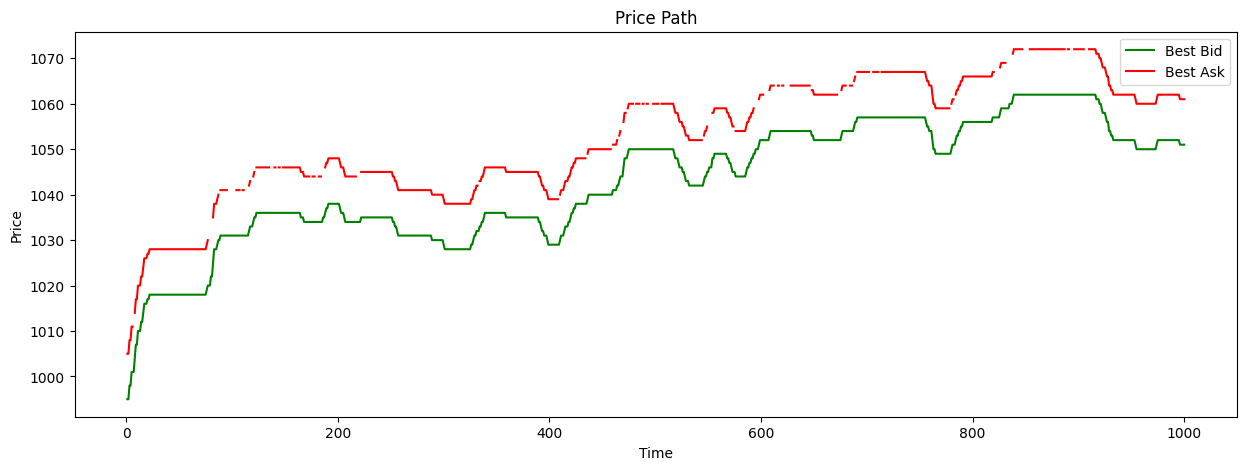

In [4]:
participant_comparison(market.participants)
price_path(market)

<Axes: >

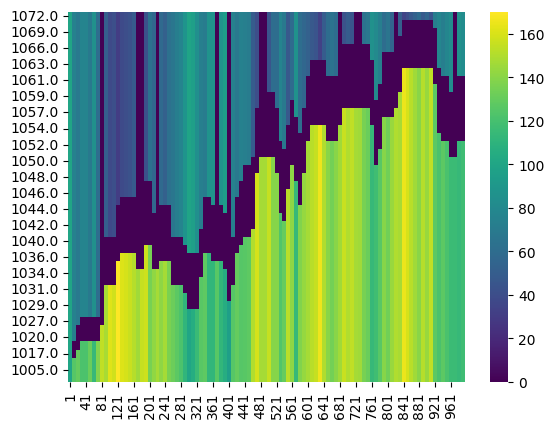

In [5]:
sns.heatmap(order_book_heatmap(market, 10), cmap='viridis')

In [6]:
participants_report(market.participants)

,AdaptiveMarketMaker_0,NoiseTrader_1
final_profit,87282.00,-87282.00
final_position,-10.00,10.00
profit_per_state,87.28,-87.28
std_profit_per_state,243.53,243.53
information_ratio,0.36,-0.36
total_trades,486.00,486.00
volume_traded,24742.00,24742.00
profit_per_volume,3.53,-3.53
average_trade_size,50.91,50.91
fill_rate,0.25,0.94


<Axes: xlabel='time'>

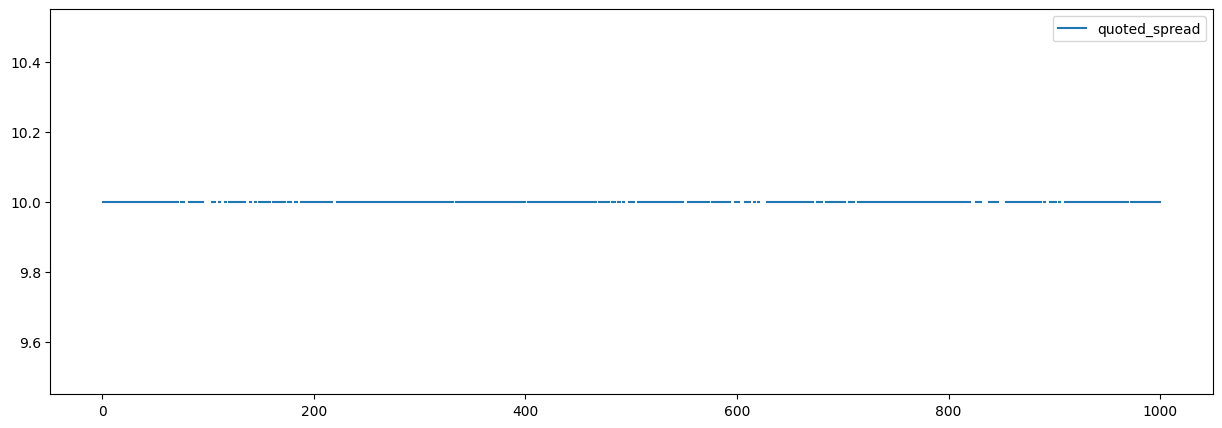

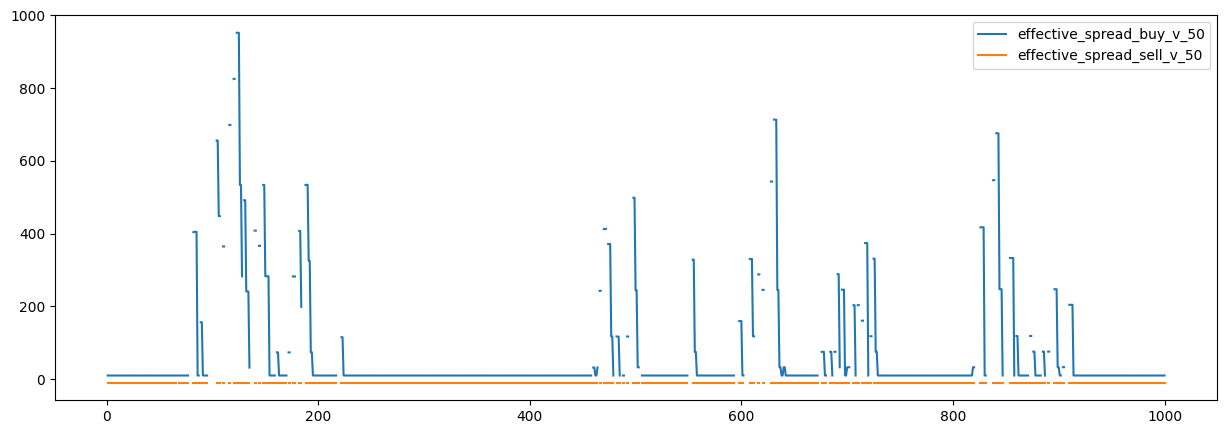

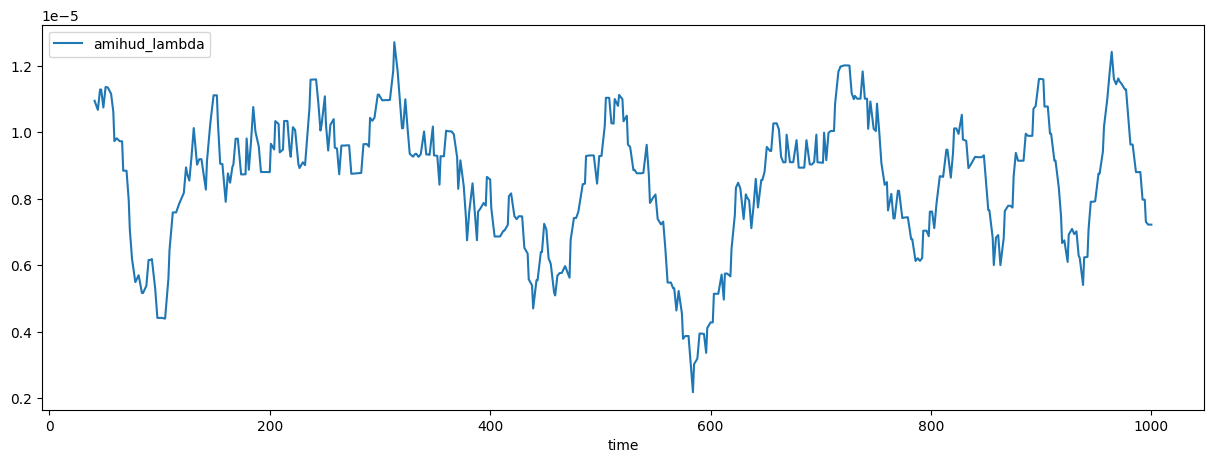

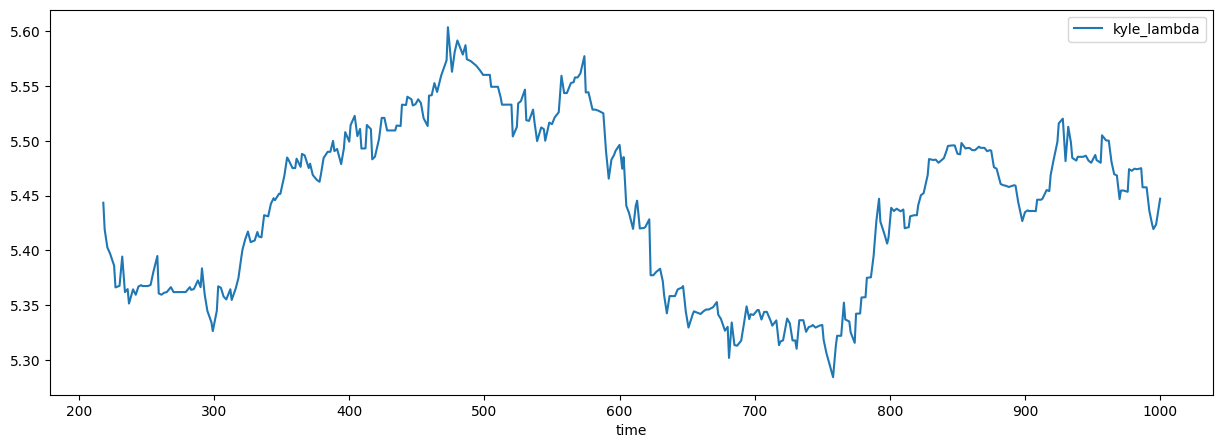

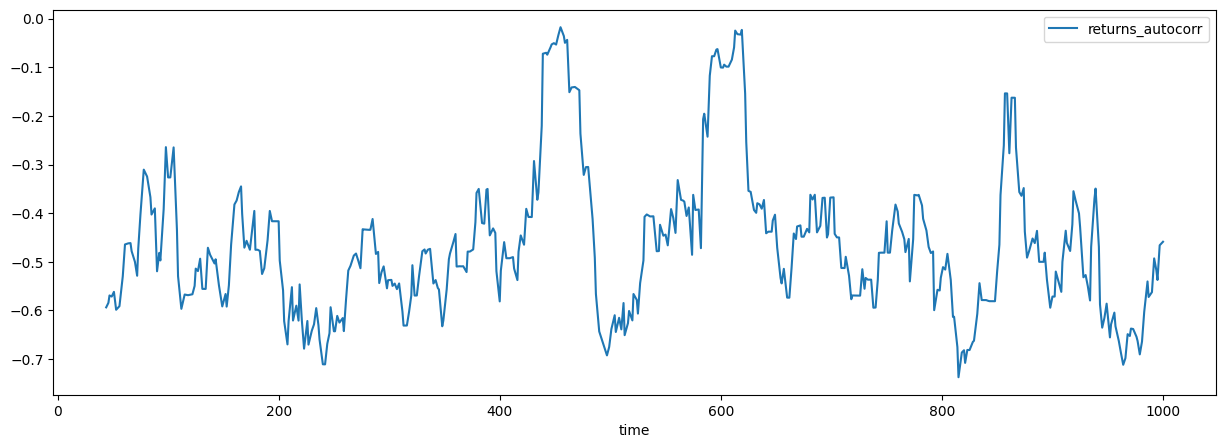

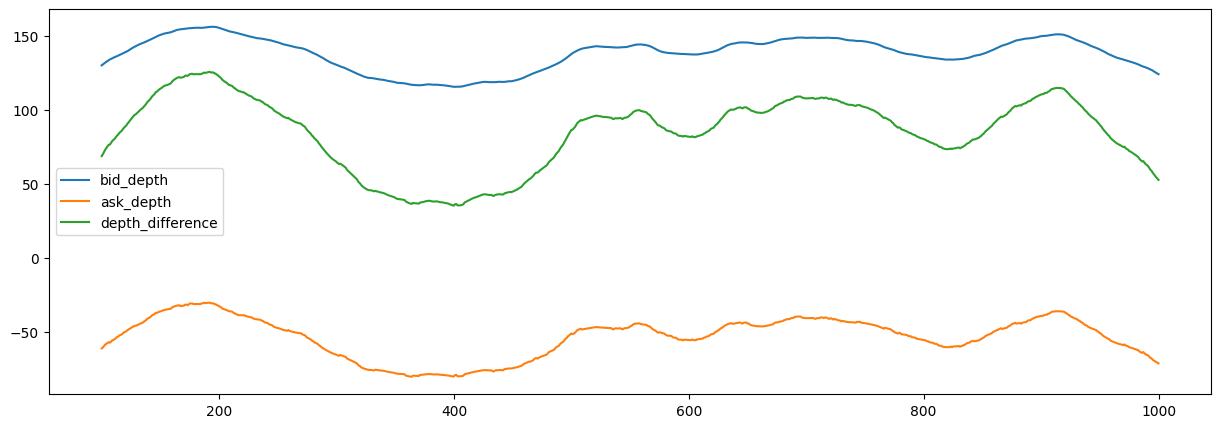

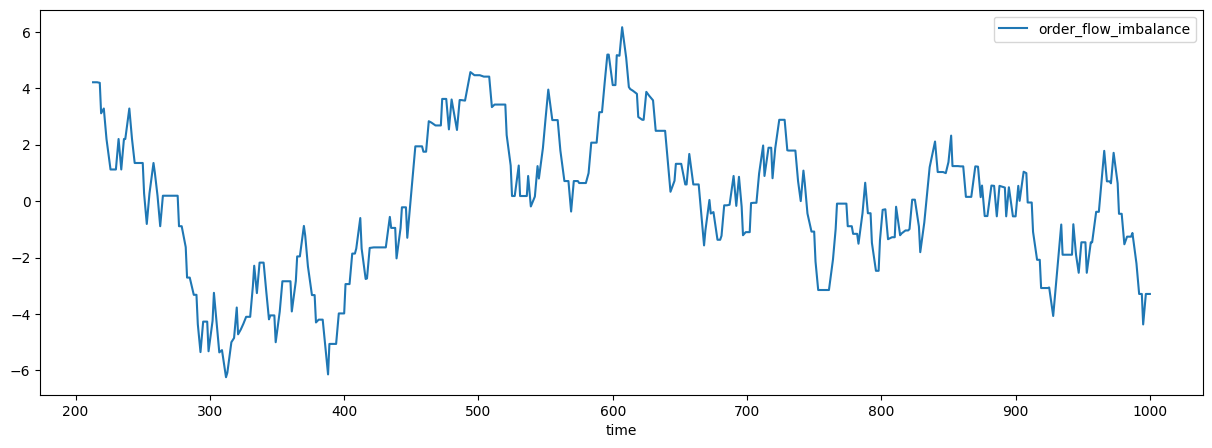

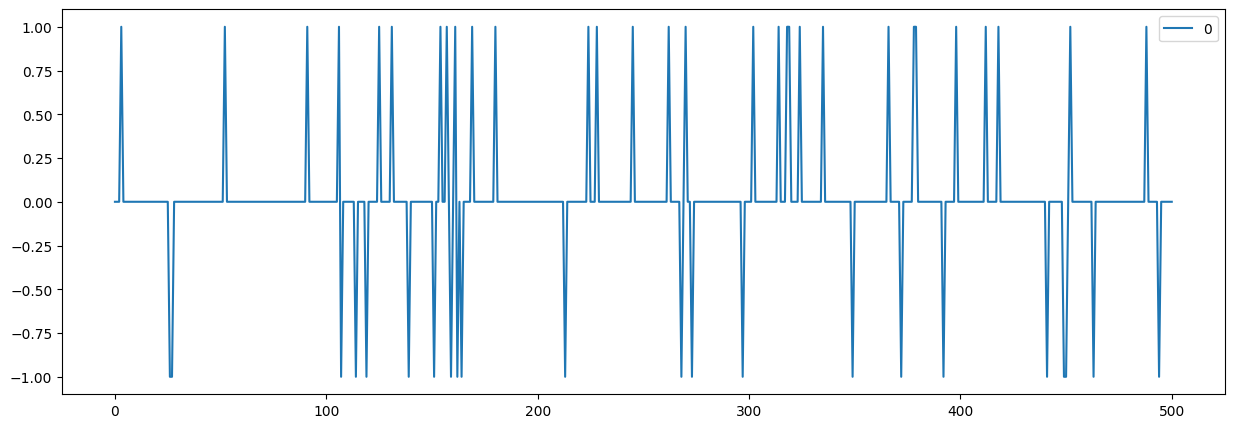

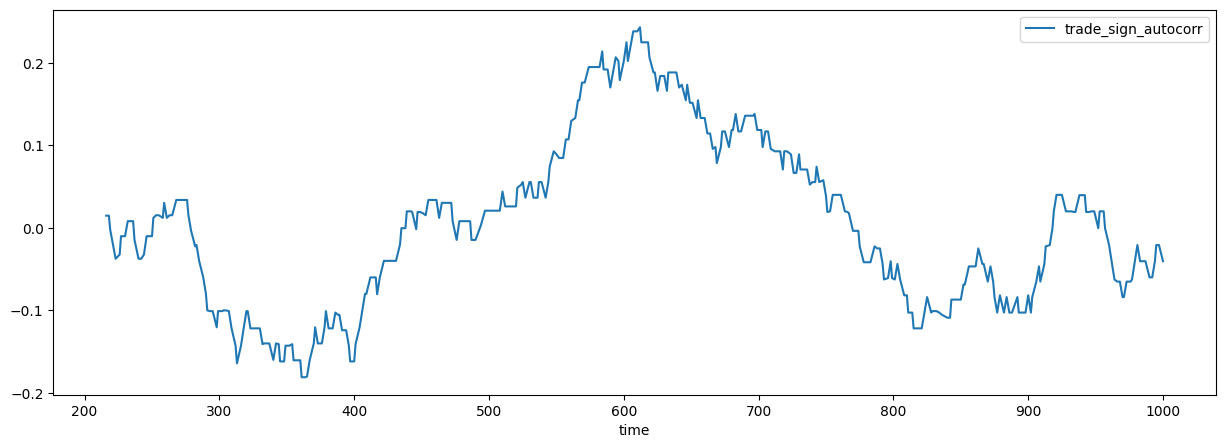

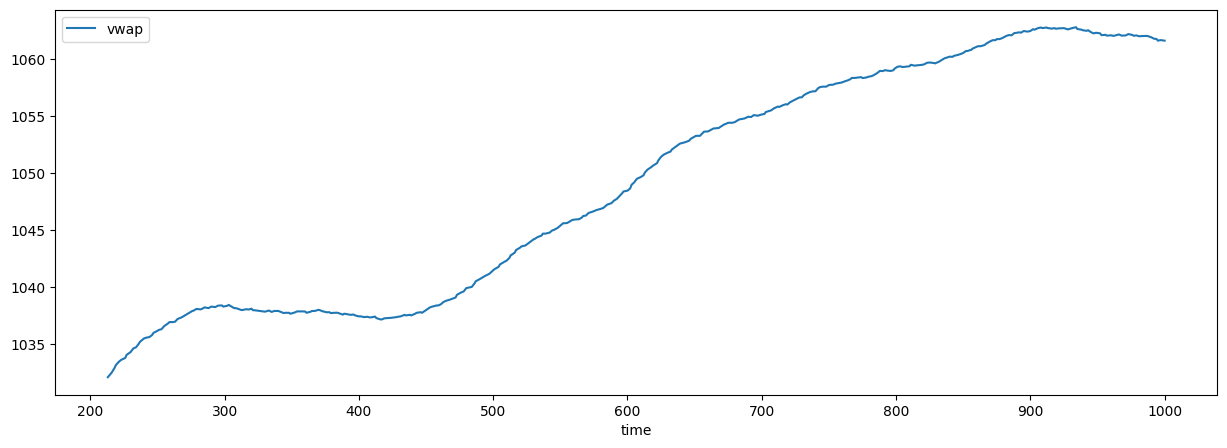

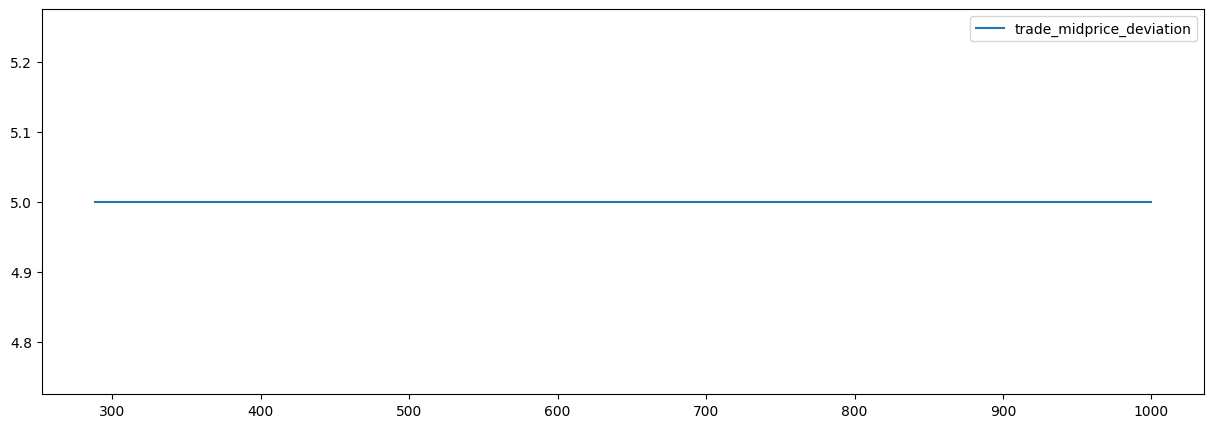

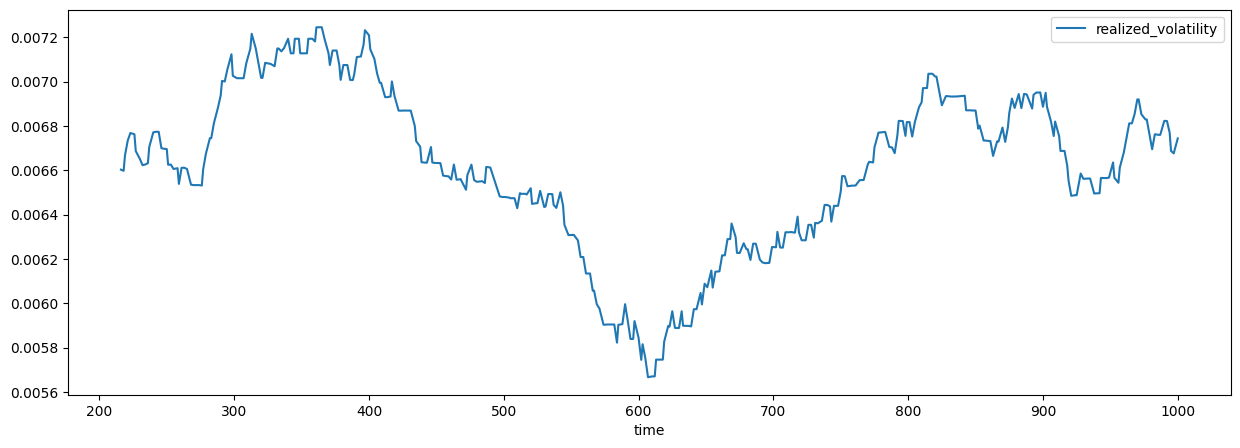

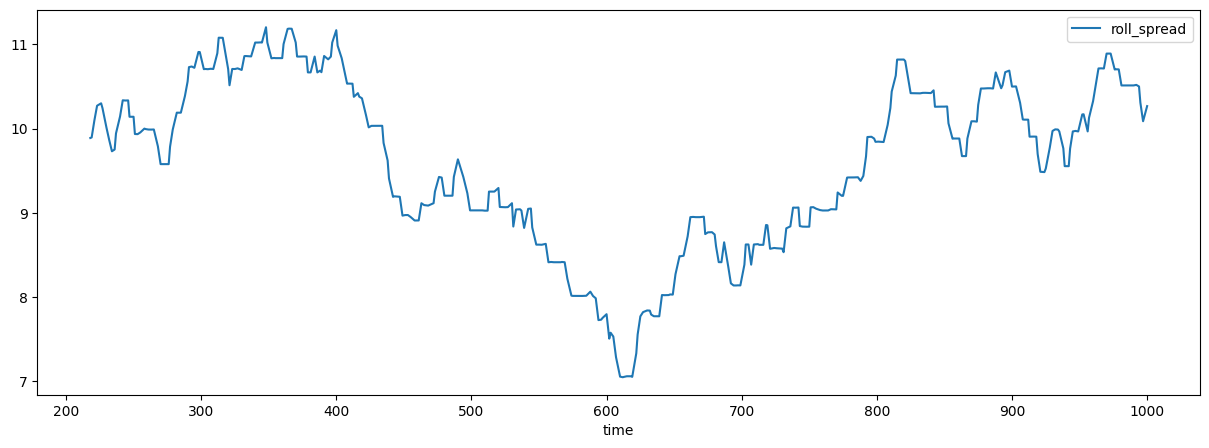

In [7]:
quoted_spread(market).plot(figsize=(15,5))
effective_spread(market, volume=50).plot(figsize=(15,5))
amihud_illiquidity(market).plot(figsize=(15,5))
kyle_lambda(market).plot(figsize=(15,5))
returns_autocorrelation(market).plot(figsize=(15,5))
order_book_depth(market).plot(figsize=(15,5))
order_flow_imbalance(market).plot(figsize=(15,5))
news_goodness(market).plot(figsize=(15,5))
trade_sign_autocorrelation(market).plot(figsize=(15,5))
vwap(market).plot(figsize=(15,5))
trade_midprice_deviation(market).plot(figsize=(15,5))
realized_volatility(market).plot(figsize=(15,5))
roll_spread_estimator(market).plot(figsize=(15,5))

In [8]:
market.ob_snapshots[450]

{'bid': [{'price': 1040, 'volume': 128}],
 'ask': [{'price': 1050, 'volume': -71}],
 'time': 451}

In [9]:
from dill import dump, load

In [10]:
with open('market.pkl', 'wb') as f:
    dump(market, f)

In [11]:
with open('market.pkl', 'rb') as f:
    market = load(f)

In [12]:
new_market = ContinuousDoubleAuction.load('market.pkl')

In [13]:
new_market